# 🏦 Home Credit Default Risk
## Notebook 3: Model Training
**Nama:** [Faisal Soultan Muhammad]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Setup
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
print("✅ Notebook 3: Model Training Started")

✅ Notebook 3: Model Training Started


## 1. Load Processed Data

In [2]:
import pickle

# Load processed data from Notebook 2
with open('processed_data.pkl', 'rb') as f:
    data = pickle.load(f)

X_train, X_test = data['X_train'], data['X_test']
y_train, y_test = data['y_train'], data['y_test']
feature_names = data['feature_names']
class_weights = data['class_weights']

print("📊 DATA LOADED:")
print(f"• X_train: {X_train.shape}")
print(f"• X_test: {X_test.shape}")
print(f"• Features: {len(feature_names)}")
print(f"• Class weights: {class_weights}")

📊 DATA LOADED:
• X_train: (246008, 30)
• X_test: (61503, 30)
• Features: 30
• Class weights: {0: np.float64(0.5439091430067283), 1: np.float64(6.193575025176234)}


## 2. Model 1: Logistic Regression

In [3]:
print("\n" + "="*70)
print("🤖 MODEL 1: LOGISTIC REGRESSION")
print("="*70)

# Train Logistic Regression
lr_model = LogisticRegression(
    class_weight=class_weights,
    C=0.1,
    max_iter=1000,
    random_state=42,
    solver='liblinear'
)

lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
lr_auc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"✅ Logistic Regression trained")
print(f"📈 ROC-AUC Score: {lr_auc:.4f}")

# Detailed metrics
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(f"\n🎯 Confusion Matrix:")
print(f"TN: {cm_lr[0,0]}, FP: {cm_lr[0,1]}")
print(f"FN: {cm_lr[1,0]}, TP: {cm_lr[1,1]}")



🤖 MODEL 1: LOGISTIC REGRESSION
✅ Logistic Regression trained
📈 ROC-AUC Score: 0.7369

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56538
           1       0.16      0.66      0.25      4965

    accuracy                           0.68     61503
   macro avg       0.56      0.67      0.53     61503
weighted avg       0.89      0.68      0.75     61503


🎯 Confusion Matrix:
TN: 38732, FP: 17806
FN: 1676, TP: 3289


## 3. Model 2: Random Forest

In [4]:
print("\n" + "="*70)
print("🌲 MODEL 2: RANDOM FOREST")
print("="*70)

# Train Random Forest (simplified for speed)
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight=class_weights,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"✅ Random Forest trained")
print(f"📈 ROC-AUC Score: {rf_auc:.4f}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred_rf))


🌲 MODEL 2: RANDOM FOREST
✅ Random Forest trained
📈 ROC-AUC Score: 0.7400

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.74      0.83     56538
           1       0.17      0.61      0.27      4965

    accuracy                           0.73     61503
   macro avg       0.56      0.67      0.55     61503
weighted avg       0.89      0.73      0.79     61503



## 4. Model 3: XGBoost

In [6]:
print("\n" + "="*70)
print("🚀 MODEL 3: XGBOOST (OPTIONAL)")
print("="*70)

try:
    import xgboost as xgb
    
    # Train XGBoost
    xgb_model = xgb.XGBClassifier(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        scale_pos_weight=class_weights[1]/class_weights[0],  # Handle imbalance
        random_state=42,
        n_jobs=-1,
        verbosity=0
    )
    
    xgb_model.fit(X_train, y_train)
    
    # Predictions
    y_pred_xgb = xgb_model.predict(X_test)
    y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
    
    # Evaluation
    xgb_auc = roc_auc_score(y_test, y_pred_proba_xgb)
    print(f"✅ XGBoost trained")
    print(f"📈 ROC-AUC Score: {xgb_auc:.4f}")
    
    print("\n📊 Classification Report:")
    print(classification_report(y_test, y_pred_xgb))
    
except ImportError:
    print("⚠️ XGBoost not installed, skipping...")
    print("Run: pip install xgboost")
    xgb_model = None
    xgb_auc = 0


🚀 MODEL 3: XGBOOST (OPTIONAL)
✅ XGBoost trained
📈 ROC-AUC Score: 0.7469

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.71      0.81     56538
           1       0.16      0.66      0.26      4965

    accuracy                           0.70     61503
   macro avg       0.56      0.68      0.54     61503
weighted avg       0.89      0.70      0.77     61503



## 5. Model Comparison

In [7]:
print("\n" + "="*70)
print("📊 MODEL COMPARISON")
print("="*70)

# Create comparison table
models_data = [
    ('Logistic Regression', lr_auc, lr_model),
    ('Random Forest', rf_auc, rf_model)
]

if xgb_model is not None:
    models_data.append(('XGBoost', xgb_auc, xgb_model))

# Display comparison
print(f"{'Model':25} {'ROC-AUC':10} {'Status':10}")
print("-"*45)
for name, auc, model in models_data:
    status = "✅" if auc > 0.7 else "⚠️" if auc > 0.65 else "❌"
    print(f"{name:25} {auc:.4f}      {status}")

# Find best model
best_model_name, best_auc, best_model = max(models_data, key=lambda x: x[1])
print(f"\n🏆 BEST MODEL: {best_model_name} (AUC: {best_auc:.4f})")


📊 MODEL COMPARISON
Model                     ROC-AUC    Status    
---------------------------------------------
Logistic Regression       0.7369      ✅
Random Forest             0.7400      ✅
XGBoost                   0.7469      ✅

🏆 BEST MODEL: XGBoost (AUC: 0.7469)


## 6. Feature Importance Analysis


🔝 FEATURE IMPORTANCE
Top 10 Most Important Features:
--------------------------------------------------
 1. EXT_SOURCE_3                   - Importance: 0.2544
 2. EXT_SOURCE_2                   - Importance: 0.2459
 3. DAYS_BIRTH                     - Importance: 0.0577
 4. DAYS_EMPLOYED                  - Importance: 0.0501
 5. AMT_GOODS_PRICE                - Importance: 0.0417
 6. NAME_EDUCATION_TYPE            - Importance: 0.0356
 7. AMT_CREDIT                     - Importance: 0.0354
 8. DAYS_LAST_PHONE_CHANGE         - Importance: 0.0332
 9. DAYS_ID_PUBLISH                - Importance: 0.0321
10. DAYS_REGISTRATION              - Importance: 0.0261


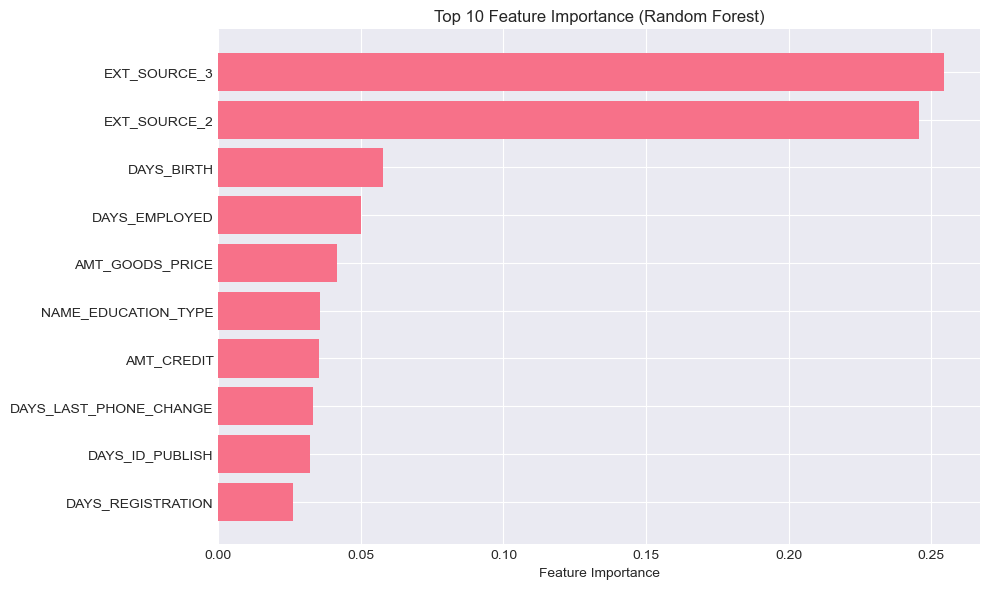

✅ Chart saved: feature_importance.png


In [8]:
print("\n" + "="*70)
print("🔝 FEATURE IMPORTANCE")
print("="*70)

# Get feature importance from Random Forest
if hasattr(rf_model, 'feature_importances_'):
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    print("Top 10 Most Important Features:")
    print("-"*50)
    for i in range(min(10, len(feature_names))):
        print(f"{i+1:2}. {feature_names[indices[i]]:30} - Importance: {importances[indices[i]]:.4f}")
    
    # Plot top 10 features
    plt.figure(figsize=(10, 6))
    top_indices = indices[:10]
    plt.barh(range(10), importances[top_indices][::-1])
    plt.yticks(range(10), [feature_names[i] for i in top_indices[::-1]])
    plt.xlabel('Feature Importance')
    plt.title('Top 10 Feature Importance (Random Forest)')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=100, bbox_inches='tight')
    plt.show()
    print("✅ Chart saved: feature_importance.png")


## 7. Save Models

In [9]:
print("\n" + "="*70)
print("💾 SAVING MODELS")
print("="*70)

# Save all models
models_to_save = {
    'logistic_regression': lr_model,
    'random_forest': rf_model,
    'xgboost': xgb_model if xgb_model is not None else None
}

with open('trained_models.pkl', 'wb') as f:
    pickle.dump(models_to_save, f)
print("✅ Saved: trained_models.pkl")

# Save evaluation results
eval_results = {
    'logistic_regression': {
        'roc_auc': lr_auc,
        'predictions': y_pred_lr,
        'probabilities': y_pred_proba_lr
    },
    'random_forest': {
        'roc_auc': rf_auc,
        'predictions': y_pred_rf,
        'probabilities': y_pred_proba_rf
    }
}

if xgb_model is not None:
    eval_results['xgboost'] = {
        'roc_auc': xgb_auc,
        'predictions': y_pred_xgb,
        'probabilities': y_pred_proba_xgb
    }

with open('model_evaluations.pkl', 'wb') as f:
    pickle.dump(eval_results, f)
print("✅ Saved: model_evaluations.pkl")


💾 SAVING MODELS
✅ Saved: trained_models.pkl
✅ Saved: model_evaluations.pkl


## 🎯 MODELLING COMPLETE!
 
**Notebook 3 selesai**
 
**Lanjut ke Notebook 4:** `04_model_evaluation.ipynb`

In [10]:
print("\n" + "="*70)
print("✅ NOTEBOOK 3 COMPLETED!")
print("="*70)
print("\n✅ 2-3 models trained successfully")
print(f"✅ Best model: {best_model_name} (AUC: {best_auc:.4f})")
print("✅ Feature importance analyzed")
print("✅ All models saved")
print("\n➡️  NEXT: Create '04_model_evaluation.ipynb'")


✅ NOTEBOOK 3 COMPLETED!

✅ 2-3 models trained successfully
✅ Best model: XGBoost (AUC: 0.7469)
✅ Feature importance analyzed
✅ All models saved

➡️  NEXT: Create '04_model_evaluation.ipynb'
